In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

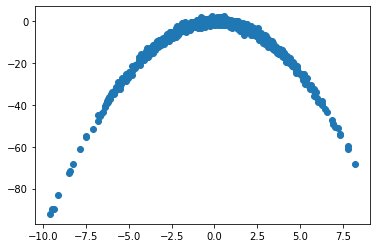

In [2]:
#target distribution q_D
N=1000
Xs = np.random.randn(2*N).reshape(N,2)
Xs[:,0]*=3
Xs[:,1]+= -Xs[:,0]**2

plt.figure()
plt.scatter(Xs[:,0],Xs[:,1])
plt.show()

In [3]:
#neural network to learn epsilon(x_t,t). you can pla around with it, but we added it for convenience

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fct = nn.Linear(4, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x,t):
        #we use a time-embedding here. neural networks are terrible at working directly with time as a real variable.
        #we therefore replace it by a set of features t_embedding that just represent several sine waves with different
        #frequency
        omegas = 2*np.pi*torch.tensor([1.0/T,2.0/T,4.0/T,8.0/T]).reshape(1,-1)
        t_embedding = torch.cos(omegas*t.reshape(-1,1))
        #Network structure: a simple network with two hidden layers. the first
        # two fully connected laers are just there to merge the time embedding with the input vector
        x = F.relu(self.fc1(x)+self.fct(t_embedding))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
#Task 1: for the given set of T and beta plot the generating distribution q(X_t) for different t=0,30,60,100
T=100
betas = 0.05*np.ones(T)
print (betas, T)

x_zero = 



[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05] 100


In [5]:
#Task 2: implement the loss function for gradient descent (eq 76 in th script, or L_simple in the background material)
#implement by sampling a random time step t in 0,..,T
#params: 
#    Xs: a batch of samples from the dataset.
#    model: the model for learning epsilon.
def loss (Xs, model):
    return torch.zeros(0)

In [6]:
#train loop. added for your convenience.
train_loader = torch.utils.data.DataLoader(torch.tensor(Xs,dtype=torch.float32), batch_size=10)
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()
num_epochs = 0 #500
for e in range(num_epochs):
    if e % (num_epochs//10) == 0:
        print("epoch:",e)
    for data in train_loader:
        optimizer.zero_grad()
        l = loss(data,model) 
        l.backward()
        optimizer.step()

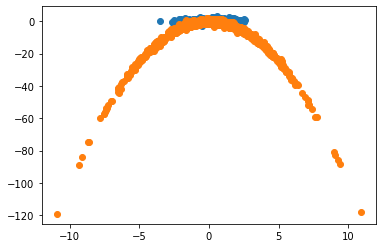

In [7]:
#Task 3: generate samples from the learned model
#num: number of samples to generate
#model: the trained model
def generate_samples(model, num):
    Xs =  torch.normal(0.0,1.0,size=(num,2),dtype=torch.float32)
    return Xs
samples = generate_samples(model,500).detach().numpy()

plt.figure()
plt.scatter(samples[:,0],samples[:,1])
plt.scatter(Xs[:,0],Xs[:,1])
plt.show()